# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress
plt.style.use('ggplot')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
cities[:10]

['mar del plata',
 'tual',
 'san patricio',
 'jacareacanga',
 'ushuaia',
 'atuona',
 'tabiauea',
 'rikitea',
 'ambon',
 'kavieng']

In [5]:
#Frist reach out to API using browser
#api.openweathermap.org/data/2.5/weather?q=pedernales&appid=2295e1d38e1b729fc6f7dd1ac6efb22d

In [6]:
city_name = cities[0]
print(city_name)
url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
print(url)

#Make a request to API endpoint ...(requests return responses)

response= requests.get(url)
print(response.status_code)
print(response.json())

mar del plata
https://api.openweathermap.org/data/2.5/weather?q=mar del plata&appid=2295e1d38e1b729fc6f7dd1ac6efb22d
200
{'coord': {'lon': -57.56, 'lat': -38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 293.15, 'feels_like': 290.3, 'temp_min': 293.15, 'temp_max': 293.15, 'pressure': 1024, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1598035467, 'sys': {'type': 1, 'id': 8305, 'country': 'AR', 'sunrise': 1598005621, 'sunset': 1598044793}, 'timezone': -10800, 'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city_weather = []
for city in cities[:]:
    
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        city_dict = response.json()
        city_weather.append(city_dict)
        print(f"City: {city.title()}, ID: {city_dict['id']}")

City: Mar Del Plata, ID: 3430863
City: Tual, ID: 1623197
City: San Patricio, ID: 3985168
City: Jacareacanga, ID: 3397763
City: Ushuaia, ID: 3833367
City: Atuona, ID: 4020109
City: Rikitea, ID: 4030556
City: Ambon, ID: 1651531
City: Kavieng, ID: 2094342
City: Ancud, ID: 3899695
City: Neuquen, ID: 3843123
City: Birjand, ID: 140463
City: Saldanha, ID: 3361934
City: New Norfolk, ID: 2155415
City: Gobo, ID: 1863614
City: Mpika, ID: 905846
City: Mezen, ID: 527321
City: Busselton, ID: 2075265
City: Hilo, ID: 5855927
City: Barrow, ID: 5880054
City: Punta Arenas, ID: 3874787
City: Vaini, ID: 4032243
City: Porto Murtinho, ID: 3452712
City: Ilulissat, ID: 3423146
City: Puerto Ayora, ID: 3652764
City: Bluff, ID: 2206939
City: Neryungri, ID: 2019309
City: Kapaa, ID: 5848280
City: Cherskiy, ID: 2126199
City: Henties Bay, ID: 3356832
City: Albany, ID: 5106841
City: Laredo, ID: 4705349
City: Touros, ID: 3386213
City: Jumla, ID: 1283285
City: Conceicao Do Araguaia, ID: 3401845
City: Dingle, ID: 1714733

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#city_dict = city_weather[0]

#result = {
           # "City": [],
           # "Lat" : [],
           # "Lng" : [],
           # "Max_temp": [],
           # "Humidity": [],
           # "Cloudiness": [],
            #"Wind_speed": [],
            #"Country": [],
           # "Date": []
#}
results = {
            "City":[],
            "Lat":[],
            "Lng":[],
            "Max_temp":[],
            "Humidity":[],
            "Cloudiness":[],
            "Wind_speed":[],
            "Country":[],
            "Date":[]


}
for city_dict in city_weather:
    results["City"].append(city_dict['name'])
    results["Lat"].append(city_dict['coord']['lat'])
    results["Lng"].append(city_dict['coord']['lon'])
    results["Max_temp"].append(city_dict['main']['temp_max'])
    results["Humidity"].append(city_dict['main']['humidity'])
    results["Cloudiness"].append(city_dict['clouds']['all'])
    results["Wind_speed"].append(city_dict['wind']['speed'])
    results["Country"].append(city_dict['sys']['country'])
    results["Date"].append(city_dict['dt'])
    
df= pd.DataFrame(results)

df.count()

City          547
Lat           547
Lng           547
Max_temp      547
Humidity      547
Cloudiness    547
Wind_speed    547
Country       547
Date          547
dtype: int64

In [9]:
df.head()

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed,Country,Date
0,Mar del Plata,-38.00,-57.56,68.00,34,0,4.70,AR,1598035260
1,Tual,-5.67,132.75,79.41,84,64,12.86,ID,1598035437
2,San Patricio,19.22,-104.70,87.80,74,75,5.82,MX,1598035546
3,Jacareacanga,-6.22,-57.75,93.20,56,20,5.82,BR,1598035546
4,Ushuaia,-54.80,-68.30,46.40,61,75,16.11,AR,1598035546


In [10]:
df.index

RangeIndex(start=0, stop=547, step=1)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
df.describe()

,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,20.168592,18.965631,68.990713,69.610603,46.961609,7.549324,1.598036e+09
std,33.499459,90.430801,14.883543,21.409836,40.227198,5.037544,8.623727e+01
min,-54.800000,-175.200000,34.000000,3.000000,0.000000,0.340000,1.598035e+09
25%,-7.780000,-58.635000,56.880000,57.000000,1.000000,3.750000,1.598036e+09
50%,24.340000,23.680000,71.600000,75.000000,40.000000,6.110000,1.598036e+09
75%,49.245000,100.260000,80.600000,86.500000,90.000000,10.310000,1.598036e+09
max,78.220000,179.320000,108.840000,100.000000,100.000000,29.930000,1.598036e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = df[df["Humidity"] <= 100].copy()

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df.to_csv("city_weather.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

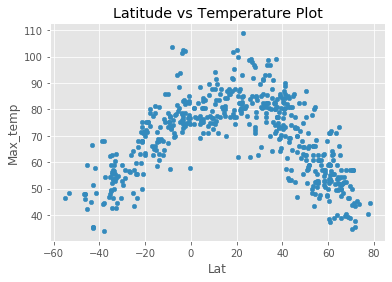

In [25]:
clean_city_data.plot.scatter("Lat", "Max_temp")
plt.title("Latitude vs Temperature Plot")
plt.savefig("output_data/fig1.png")
plt.show()


## Latitude vs. Humidity Plot

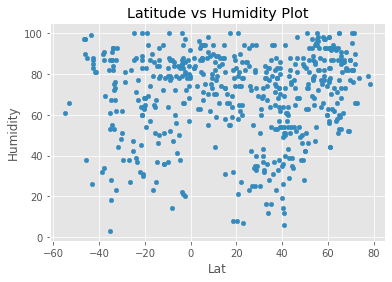

In [26]:
clean_city_data.plot.scatter("Lat", "Humidity")
plt.title("Latitude vs Humidity Plot")
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

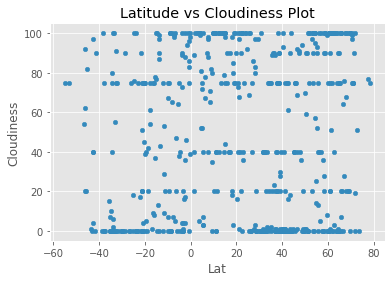

In [27]:
clean_city_data.plot.scatter("Lat", "Cloudiness")
plt.title("Latitude vs Cloudiness Plot")
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

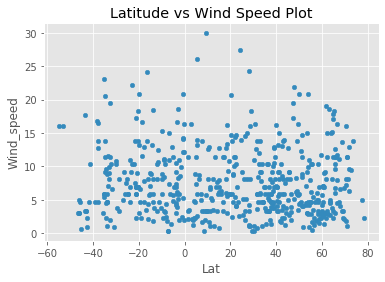

In [28]:
clean_city_data.plot.scatter("Lat", "Wind_speed")
plt.title("Latitude vs Wind Speed Plot")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots

In [20]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

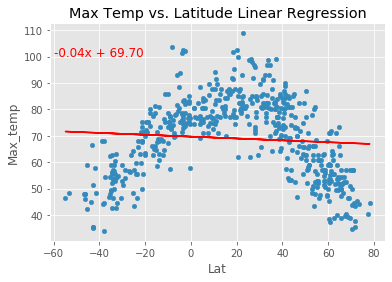

In [29]:
xy = clean_city_data[["Lat", "Max_temp"]]
m, b, r2, p, stderr = linregress(xy)

x= xy["Lat"]
line = m*x + b

eq = f"{m:.2f}x + {b:.2f}"


xy.plot.scatter("Lat", "Max_temp")
plt.plot(x, line, "r")
plt.text(-60,100, eq, color='r', size=12)
plt.title("Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

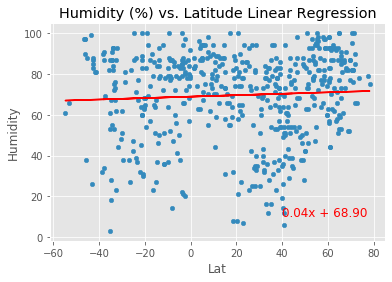

In [30]:
xy = clean_city_data[["Lat", "Humidity"]]
m, b, r2, p, stderr = linregress(xy)

x= xy["Lat"]
line = m*x + b

eq = f"{m:.2f}x + {b:.2f}"

xy.plot.scatter("Lat", "Humidity")
plt.plot(x, line, "r")
plt.text(40,10, eq, color='r', size=12)
plt.title("Humidity (%) vs. Latitude Linear Regression")
plt.savefig("output_data/fig6.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

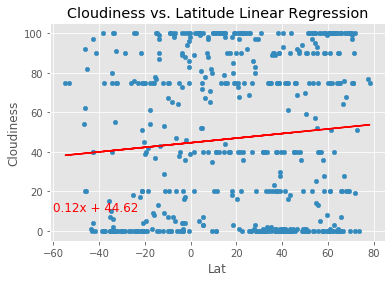

In [31]:
xy = clean_city_data[["Lat", "Cloudiness"]]
m, b, r2, p, stderr = linregress(xy)

x= xy["Lat"]
line = m*x + b

eq = f"{m:.2f}x + {b:.2f}"

xy.plot.scatter("Lat", "Cloudiness")
plt.plot(x, line, "r")
plt.text(-60,10, eq, color='r', size=12)
plt.title("Cloudiness vs. Latitude Linear Regression")
plt.savefig("output_data/fig7.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

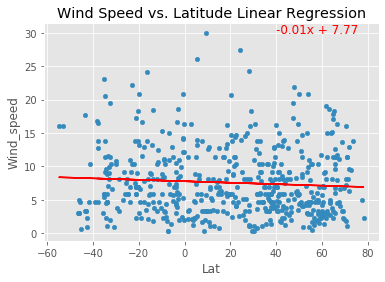

In [32]:
xy = clean_city_data[["Lat", "Wind_speed"]]
m, b, r2, p, stderr = linregress(xy)

x= xy["Lat"]
line = m*x + b

eq = f"{m:.2f}x + {b:.2f}"

xy.plot.scatter("Lat", "Wind_speed")
plt.plot(x, line, "r")
plt.text(40,30, eq, color='r', size=12)
plt.title("Wind Speed vs. Latitude Linear Regression")
plt.savefig("output_data/fig8.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression